# Data cleaner

In [85]:
import numpy as np
import os
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
working_dir = '/home/jovyan/LCCS/training_data/'
filename = os.path.join(working_dir, 'training_data_2015_ga_ls8c_ard_3.txt')

In [101]:
# Load data array
model_input = np.loadtxt(filename, skiprows=1)
print(model_input.shape)

(217, 12)


In [102]:
# Load column names
with open(filename, 'r') as file:
    header = file.readline()
column_names = header.split()[1:]
print(column_names)
# Extract string for class labels
classlabel = column_names[0]

['classnum', 'SOS', 'POS', 'EOS', 'Trough', 'vSOS', 'vPOS', 'vEOS', 'LOS', 'AOS', 'ROG', 'ROS']


In [103]:
# Class labels

np.unique(model_input[:,0])

array([111., 112., 215.])

In [104]:
column_names_indices = {}

for col_num, var_name in enumerate(column_names):
    column_names_indices[var_name] = col_num

# model_variables = ['red', 'blue', 'green', 'nir', 'swir1', 'swir2', 'sdev', 'edev']
model_variables = column_names[1:]
model_col_indices = []

for model_var in model_variables:
    model_col_indices.append(column_names_indices[model_var])

In [105]:
x = model_input[:,model_col_indices]
y = model_input[:,0]

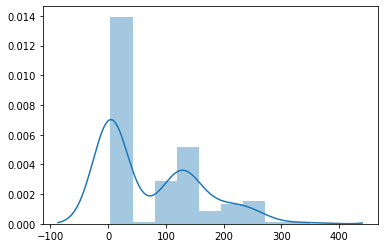

In [106]:
sns.distplot(x[:,1])

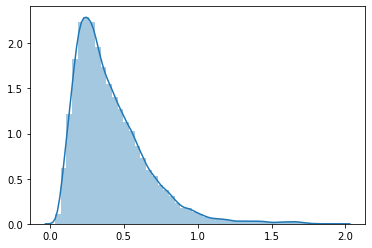

In [97]:
sns.distplot(x[:,1])

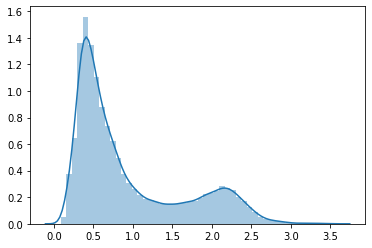

In [96]:
sns.distplot(x[:,0])

---

## Data Wrangling

**Seperate crop and non-crop classes**

In [81]:
crop = model_input[model_input[:,0]==111]
non_crop = model_input[model_input[:,0]!=111]

**Convert into pandas dataframes for ease**

In [82]:
crop_df = pd.DataFrame(crop).rename(columns={i:column_names[i] for i in range(0,len(column_names))}).drop(classlabel, axis=1)
non_crop_df = pd.DataFrame(non_crop).rename(columns={i:column_names[i] for i in range(0,len(column_names))}).drop(classlabel, axis=1)

**Normalise values**

So they can all plot on the same graph. Normalize by min/max values

In [98]:
crop_df = (crop_df-crop_df.min())/(crop_df.max()-crop_df.min())
non_crop_df = (non_crop_df-non_crop_df.min())/(non_crop_df.max()-non_crop_df.min())

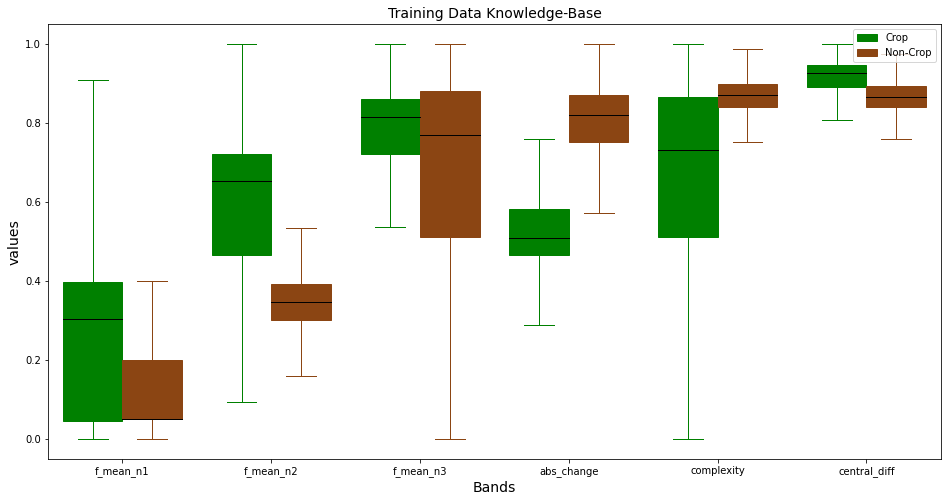

In [99]:
fig, ax = plt.subplots(figsize=(16,8))

crop_col ='green'
non_crop_col ='saddlebrown'

pp = ax.boxplot(crop_df.values,
                patch_artist=True,
                showfliers=False, 
                positions=np.arange(crop_df.values.shape[1])-.2, widths=0.4,
                boxprops=dict(facecolor=crop_col, color=crop_col),
                capprops=dict(color=crop_col),
                whiskerprops=dict(color=crop_col),
                flierprops=dict(color=crop_col, markeredgecolor=crop_col),
                medianprops=dict(color='black'))   

fp = ax.boxplot(non_crop_df.values,
                patch_artist=True, 
                showfliers=False,
                positions=np.arange(crop_df.values.shape[1])+.2, widths=0.4,
                boxprops=dict(facecolor=non_crop_col, color=non_crop_col),
                capprops=dict(color=non_crop_col),
                whiskerprops=dict(color=non_crop_col),
                flierprops=dict(color=non_crop_col, markeredgecolor=non_crop_col),
                medianprops=dict(color='black'))   

ax.set_xticks(np.arange(len(column_names[1:])))
ax.set_xticklabels(column_names[1:])
ax.set_xlim(-0.5,len(column_names[1:])-.5)
ax.set_ylabel("values", fontsize=14)
ax.set_xlabel("Bands", fontsize=14)
ax.set_title("Training Data Knowledge-Base", fontsize=14)
ax.legend([pp["boxes"][0], fp["boxes"][0]], ['Crop', 'Non-Crop'], loc='upper right')

plt.show()

---
## Feature layer boxplots

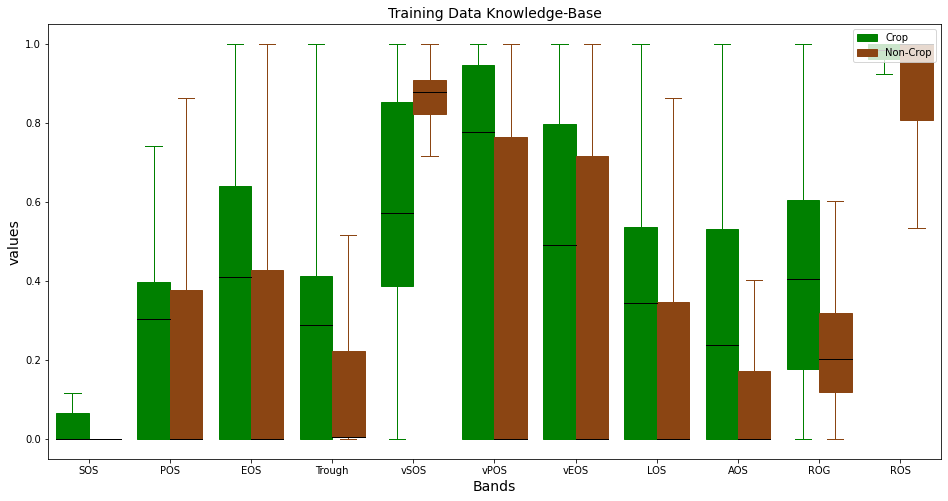

In [60]:
fig, ax = plt.subplots(figsize=(16,8))

crop_col ='green'
non_crop_col ='saddlebrown'

pp = ax.boxplot(crop_df.values,
                patch_artist=True,
                showfliers=False, 
                positions=np.arange(crop_df.values.shape[1])-.2, widths=0.4,
                boxprops=dict(facecolor=crop_col, color=crop_col),
                capprops=dict(color=crop_col),
                whiskerprops=dict(color=crop_col),
                flierprops=dict(color=crop_col, markeredgecolor=crop_col),
                medianprops=dict(color='black'))   

fp = ax.boxplot(non_crop_df.values,
                patch_artist=True, 
                showfliers=False,
                positions=np.arange(crop_df.values.shape[1])+.2, widths=0.4,
                boxprops=dict(facecolor=non_crop_col, color=non_crop_col),
                capprops=dict(color=non_crop_col),
                whiskerprops=dict(color=non_crop_col),
                flierprops=dict(color=non_crop_col, markeredgecolor=non_crop_col),
                medianprops=dict(color='black'))   

ax.set_xticks(np.arange(len(column_names[1:])))
ax.set_xticklabels(column_names[1:])
ax.set_xlim(-0.5,len(column_names[1:])-.5)
ax.set_ylabel("values", fontsize=14)
ax.set_xlabel("Bands", fontsize=14)
ax.set_title("Training Data Knowledge-Base", fontsize=14)
ax.legend([pp["boxes"][0], fp["boxes"][0]], ['Crop', 'Non-Crop'], loc='upper right')

plt.show()

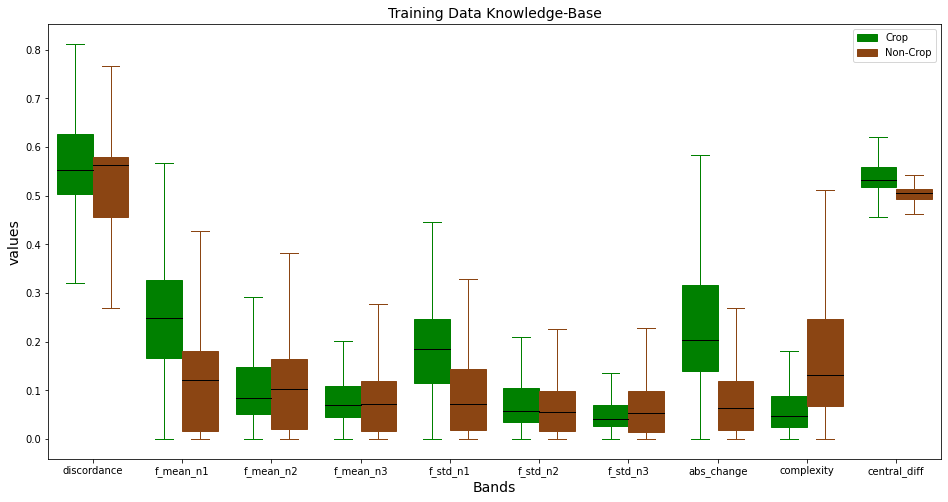

In [10]:
fig, ax = plt.subplots(figsize=(16,8))

crop_col ='green'
non_crop_col ='saddlebrown'

pp = ax.boxplot(crop_df.values,
                patch_artist=True,
                showfliers=False, 
                positions=np.arange(crop_df.values.shape[1])-.2, widths=0.4,
                boxprops=dict(facecolor=crop_col, color=crop_col),
                capprops=dict(color=crop_col),
                whiskerprops=dict(color=crop_col),
                flierprops=dict(color=crop_col, markeredgecolor=crop_col),
                medianprops=dict(color='black'))   

fp = ax.boxplot(non_crop_df.values,
                patch_artist=True, 
                showfliers=False,
                positions=np.arange(crop_df.values.shape[1])+.2, widths=0.4,
                boxprops=dict(facecolor=non_crop_col, color=non_crop_col),
                capprops=dict(color=non_crop_col),
                whiskerprops=dict(color=non_crop_col),
                flierprops=dict(color=non_crop_col, markeredgecolor=non_crop_col),
                medianprops=dict(color='black'))   

ax.set_xticks(np.arange(len(column_names[1:])))
ax.set_xticklabels(column_names[1:])
ax.set_xlim(-0.5,len(column_names[1:])-.5)
ax.set_ylabel("values", fontsize=14)
ax.set_xlabel("Bands", fontsize=14)
ax.set_title("Training Data Knowledge-Base", fontsize=14)
ax.legend([pp["boxes"][0], fp["boxes"][0]], ['Crop', 'Non-Crop'], loc='upper right')

plt.show()